In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/home/nhi/WFH_ECU_Project(25Mar20)/Data/big_data(23April20)/project(23April20)/data_shuffle(b_m).csv")

In [3]:
df

,labels,B_min,B_max,B_mean,B_std,B_skew,B_kurtosis,B_mode,B_entropy,B_energy,...,R_energy,h_mean,v_mean,cb_mean,cr_mean,gray_mean,contrast,correlation,energy,homogeneity
0,0,118,255,203.558132,62.681773,-0.403019,-1.837075,255,10.799481,148.548274,...,148.548274,0,203.558132,128,128,203.558132,371.989708,0.952714,0.612753,371.989708
1,1,0,255,145.020474,126.004662,-0.277543,-1.922811,255,10.291147,1327.389790,...,1327.389790,0,145.020474,128,128,145.020474,3408.680675,0.892718,0.517615,3408.680675
2,1,0,255,136.873236,126.928384,-0.147385,-1.978152,255,10.232555,1196.212191,...,1196.212191,0,136.873236,128,128,136.873236,2952.397860,0.908347,0.548479,2952.397860
3,0,120,255,220.989074,56.431372,-1.065332,-0.864294,255,10.813326,180.070087,...,180.070087,0,220.989074,128,128,220.989074,385.886749,0.939135,0.671990,385.886749
4,1,0,255,135.415087,126.998911,-0.124097,-1.984459,255,10.222746,1172.807492,...,1172.807492,0,135.415087,128,128,135.415087,2985.061011,0.907426,0.530004,2985.061011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,1,0,255,132.992858,126.755855,-0.086434,-1.992240,255,10.212401,4823.704225,...,4823.704225,0,132.992858,128,128,132.992858,12981.662196,0.595851,0.280444,12981.662196
4678,0,119,255,200.149819,63.100869,-0.297873,-1.909774,255,10.797601,726.003236,...,726.003236,0,200.149819,128,128,200.149819,1825.517212,0.770405,0.370028,1825.517212
4679,0,120,255,212.638378,60.144473,-0.722133,-1.477708,255,10.806131,230.476222,...,230.476222,0,212.638378,128,128,212.638378,597.377412,0.917062,0.621152,597.377412
4680,0,120,255,205.599565,61.930899,-0.482881,-1.764840,255,10.801294,1198.161099,...,1198.161099,0,205.599565,128,128,205.599565,3161.718198,0.586811,0.262579,3161.718198


In [4]:
X = np.array(df.iloc[:,1:])
y = np.array(df.labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3511, 36)
X_test:  (1171, 36)
y_train:  (3511,)
y_test:  (1171,)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#KNN
from sklearn .neighbors import KNeighborsClassifier 
#kn = KNeighborsClassifier(n_neighbors =5)
kn = KNeighborsClassifier(n_neighbors =11)
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
#print(Y_pred)

In [8]:
# Accuracy
from sklearn.metrics import accuracy_score
#from sklearn.metrics import average_precision_score
print("accuracy_score:",format(accuracy_score(y_test, y_pred)))
#print("Cancer data set dimensions: {}".format(df.shape))

accuracy_score: 0.9991460290350128


In [9]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n{}".format(cm_knn))

from sklearn.metrics import accuracy_score
print("accuracy score:{}".format(accuracy_score(y_test, y_pred))) 


confusion matrix: 
[[602   1]
 [  0 568]]
accuracy score:0.9991460290350128


In [10]:
(602+568)*100/(602+1+568), 602*100/(602+1), 602*100/(602+0), 568*100/(568+1)

(99.91460290350128, 99.83416252072969, 100.0, 99.82425307557118)

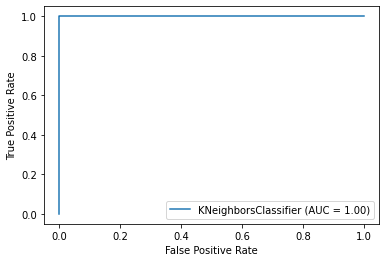

In [12]:
#ROC curve
from sklearn.metrics import plot_roc_curve
%matplotlib inline
svc_disp = plot_roc_curve(kn, X_test, y_test)
plt.show()

In [13]:
# K-folder cross validation
from sklearn.model_selection import cross_val_score

# Use the same model as before
kn = KNeighborsClassifier(n_neighbors = 5)

# X,y will automatically devided by 5 folder
scores = cross_val_score(kn, X, y, cv=5, scoring='accuracy')

# print all 5 times scores
print("scores:{}".format(scores))

# average these five scores to get accuracy score
print("scores_mean: {}".format(scores.mean()))


scores:[0.99039488 0.99039488 0.9957265  0.99252137 0.98931624]
scores_mean: 0.991670771419971


In [14]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
#print(k_range)
param_grid = dict(n_neighbors=k_range)
#print(param_grid)
grid = GridSearchCV(kn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [15]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [16]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.997008547008547
{'n_neighbors': 2}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
